# Imports

In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.OrdinalRegression import OrdinalRegression, softplus, softplus_inv, plot_model
import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from autograd import grad, value_and_grad

# Toy Data

In [4]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv')
state_2_df

,temperature_1,temperature_2,ordinal_label
0,13.446886,-0.552414,1
1,12.467339,-0.456510,1
2,12.240646,1.487031,3
3,12.920970,1.347114,3
4,12.365956,-0.505576,1
...,...,...,...
995,13.299201,-1.777017,0
996,12.508565,1.482781,3
997,12.692524,0.986925,2
998,12.897209,-0.374903,1


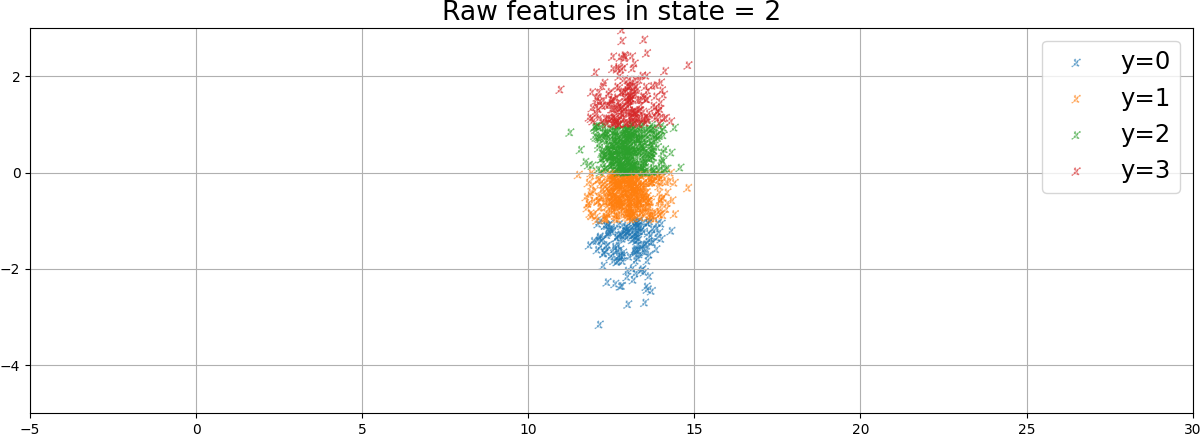

In [9]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state_2.png') 

In [5]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[13.4468864  -0.55241445]
 [12.46733864 -0.45650953]
 [12.24064581  1.48703067]
 ...
 [12.69252415  0.9869254 ]
 [12.89720911 -0.37490277]
 [14.0738536   1.12059795]]
y: (1000,)
[1 1 3 3 1 2 2 1 0 1 2 1 1 2 1 3 2 2 1 0 0 2 2 1 2 1 1 0 2 2 0 0 2 2 1 2 0
 2 2 2 1 3 0 1 1 0 3 1 3 1 3 1 0 2 1 2 2 1 2 2 2 1 3 2 1 0 0 1 1 1 3 1 1 1
 0 2 1 1 2 3 1 2 2 1 2 2 3 1 0 1 0 1 1 2 2 0 0 0 1 2 2 2 2 2 1 0 2 1 3 2 1
 2 3 1 3 3 2 2 0 2 2 0 3 1 3 1 2 1 0 1 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 3 3 1
 3 3 3 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1 1 1 1 2 1 1 2 3 3 0 1 2 2 0 2 0 2 2
 2 2 1 1 2 3 2 1 1 0 1 2 2 2 0 1 2 0 1 2 2 1 1 2 1 2 3 0 1 3 2 0 2 1 1 0 2
 3 2 1 2 3 2 3 3 2 1 1 3 3 1 0 2 1 2 1 1 1 3 1 2 3 2 1 3 1 3 0 1 3 2 0 1 3
 1 3 2 3 0 2 2 1 1 1 1 3 2 1 2 2 1 3 3 2 2 2 1 3 1 0 1 2 1 3 2 1 2 3 0 3 2
 3 2 1 2 1 0 1 2 0 2 1 2 1 2 1 2 2 2 3 2 1 1 1 0 3 2 2 2 1 3 2 0 2 1 3 2 3
 1 1 3 3 1 0 3 2 1 0 2 2 1 3 2 2 2 3 3 3 2 0 2 1 3 1 0 3 1 1 1 2 1 2 0 3 2
 1 3 0 3 3 2 3 1 2 3 2 2 2 1 1 1 3 0 0 2 2 1 0 2 2 3 2 2 0

# Ordinal Regression

INIT weights:
[ 1.3315865   0.71527897 -1.54540029]
INIT cutpoints:
[-3.  0.  3.]
INIT deltas:
[3. 3.]
INIT epsilons:
[2.94893082 2.94893082]
INIT PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
[ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -3.          2.94893082  2.94893082  1.3315865   0.71527897
 -1.54540029]
PARAMS:
[ 0.54132485 -2.91751682  3.0273074   3.0273074   1.24910333 -0.26904933
 -1.61754636]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.91751682  3.0273074   3.0273074   1.24910333 -0.26904933
 -1.61754636]
PARAMS:
[ 0.54132485 -2.9986825   2.95018273  2.95018273  1.330269    0.69955631
 -1.54655268]
PARAMS:
Autograd ArrayBox with value [ 0.54132485 -2.9986825   2.95018273  2.95018273  1.330269    0.69955631
 -1.54655268]
PARAMS:
[ 0.54132485 -2.92896319  3.01643091  3.01643091  1.2605497  -0.13245194
 -1.60753449]
PARAMS

/Users/alexanderlobo/Code/pchmm-missing-data-limited-labels/venv/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/alexanderlobo/Code/pchmm-missing-data-limited-labels/venv/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


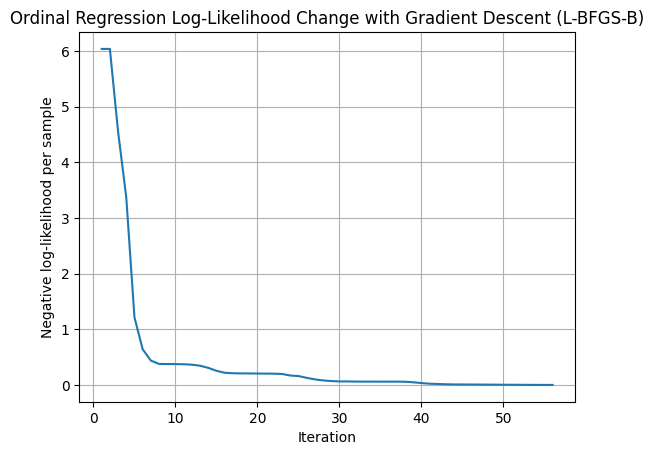

In [6]:
clf = OrdinalRegression(noise_variance = 1, random_state=10)
clf.fit(X, y, save_loss=True)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

(1000, 1000)
(1000, 1000)


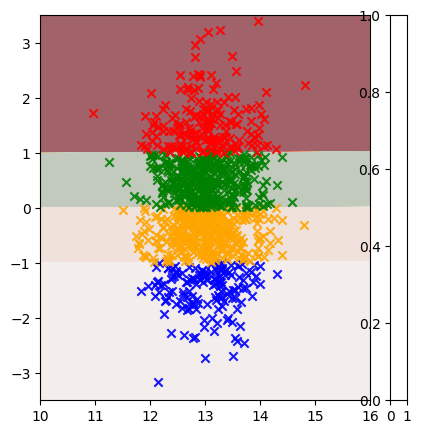

In [7]:
plot_model(clf)

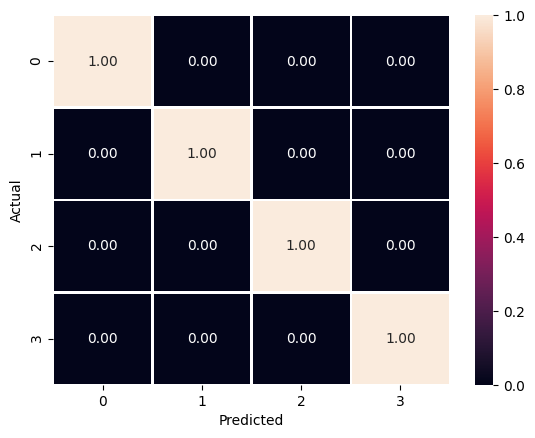

In [8]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Testing

In [ ]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [ ]:
clf = OrdinalRegression(padding=50)
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [ ]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [ ]:
clf.fit(X, y)

In [ ]:
best_w = clf.w

In [ ]:
clf.predict(X)

In [ ]:
clf.log_likelihood(w_inits[99], X, y)

# Softplus

In [ ]:
test_arr = np.random.normal(size=3)
print(test_arr)
inverse_arr = softplus_inv(test_arr)
print(inverse_arr)
recovered = softplus(inverse_arr)
print(recovered)

In [ ]:
softplus_inv(-0.5969)